In [2]:
import numpy as np
import re
import csv
import mailbox

import pandas as pd
import pandas.plotting

import scipy.stats

import matplotlib 
import matplotlib.pyplot as plt

# API для отображения инструментария Python
from IPython import display
from ipywidgets import interact, widgets

# # %matplotlib inline указывает, что график необходимо построить все в той же оболочке Jupyter, 
# но теперь он выводится как обычная картинка.
%matplotlib inline

In [14]:
# Изучим результаты двадцатилетнего исследования выживаемости курильщиков
smoking = pd.read_csv('уикхем.xls')
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [18]:
pd.DataFrame(smoking.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [19]:
# Нормализация еще известна как пропорции
pd.DataFrame(smoking.outcome.value_counts(normalize = True))

,outcome
Alive,0.719178
Dead,0.280822


In [26]:
# Определим, сколько выживших курит или, сколько не выживших курит или нет
bysmoker = smoking.groupby('smoker').outcome.value_counts(normalize=True)
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [28]:
# Стратификация-группировка методом cut, причем ярлыков групп должно быть на одну меньше чем границ – 30, 40, 53, 64
smoking['ageGroup'] = pd.cut(smoking.age,[0, 30, 40, 53, 64, 120], labels = ['0-30', '31-40', '41-52', '53-63', '64+'])
smoking['ageGroup'].head()

0     0-30
1     0-30
2      64+
3      64+
4    53-63
Name: ageGroup, dtype: category
Categories (5, object): [0-30 < 31-40 < 41-52 < 53-63 < 64+]

In [29]:
smoking['age'].head()

0    23
1    18
2    71
3    67
4    64
Name: age, dtype: int64

In [30]:
byage = smoking.groupby(['ageGroup', 'smoker']).outcome.value_counts(normalize=True)
byage.unstack().drop('Dead', axis = 1)

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
31-40    No      0.955224
         Yes     0.940678
41-52    No      0.876106
         Yes     0.802395
53-63    No      0.669291
         Yes     0.580645
64+      No      0.145078
         Yes     0.120000

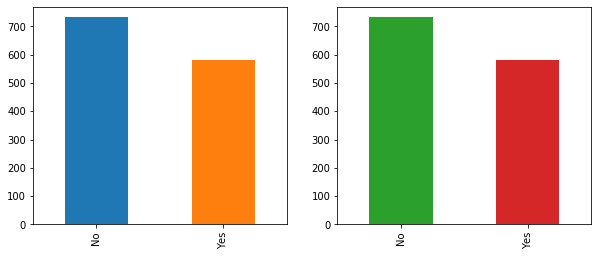

In [34]:
# Парадокс Симпсона — явление в статистике, когда при наличии двух групп данных, в каждой из которых наблюдается одинаково
# направленная зависимость, при объединении этих групп направление зависимости меняется на противоположное. Проще говоря, наконец-то
# стало видно, что курение губительно для жизни. К примеру, самый опасный возраст для курящего – 53-63 года.
# Построим двойную гистограмму и настроим его внешний вид. Зазадим размер холста, укажем относительное местоположение субграфика на холсте
# с помощью subplot, 
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1);smoking.smoker.value_counts().plot(kind='bar', colors =['C0', 'C1']); plt.title='Выживших'
plt.subplot(1,2,2);smoking.smoker.value_counts().plot(kind='bar', colors = ['C2', 'C3']); plt.title='Курильщиков'

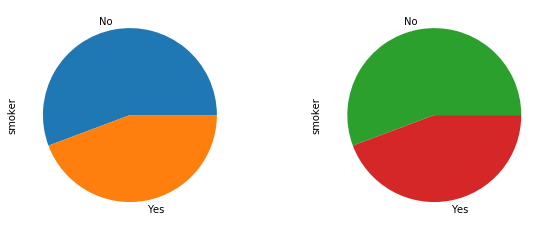

In [36]:
# Теперь – круговая
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1);smoking.smoker.value_counts().plot(kind='pie', colors =['C0', 'C1']); plt.title='Выживших'
plt.subplot(1,2,2);smoking.smoker.value_counts().plot(kind='pie', colors = ['C2', 'C3']); plt.title='Курильщиков'

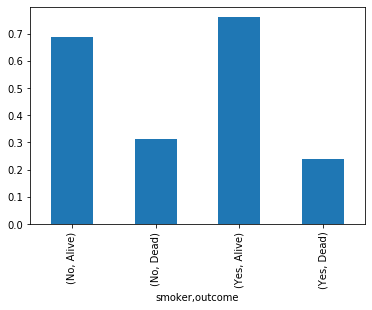

In [37]:
bysmoker.plot(kind='bar')

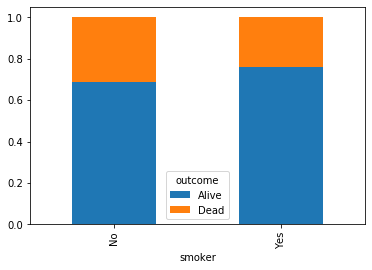

In [39]:
# Изменим ярлыки, сопоставив столбцы гистограммы
bysmoker.unstack().plot(kind='bar', stacked=True)

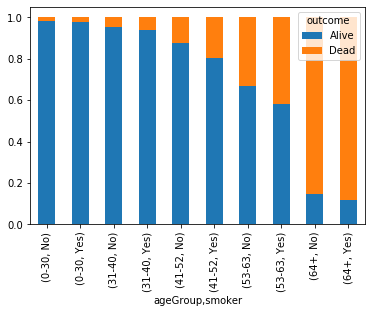

In [40]:
# По возрасту
byage.unstack().plot(kind='bar', stacked=True)

In [42]:
byage.unstack().drop("Dead", axis = 1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
31-40     0.955224  0.940678
41-52     0.876106  0.802395
53-63     0.669291  0.580645
64+       0.145078  0.120000

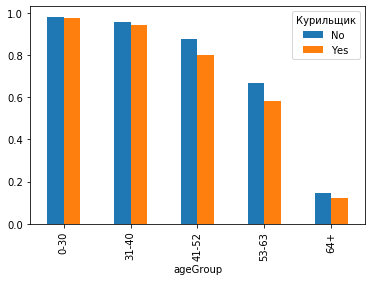

In [45]:
byage2 = byage.unstack().drop("Dead", axis = 1).unstack()
byage2.columns = ["No", "Yes"]
byage2.columns.name="Курильщик"
byage2.plot(kind = 'bar')